# Visualize Results of Matching Runs from CORP Runs with extra processing 2

## Import in data from runs

In [2]:
import pandas as pd

In [3]:
data_df = pd.read_csv('corp_runs_12_11.csv')

In [4]:
data_df['settings_file'].unique()

array(['dedupe_extension/settings_0', 'dedupe_extension/settings_2',
       'dedupe_extension/settings_3', 'dedupe_extension/settings_4',
       'dedupe_extension/settings_1',
       'dedupe_extension/settings/settings_1',
       'dedupe_extension/settings/settings_4',
       'dedupe_extension/settings/settings_0',
       'dedupe_extension/settings/settings_2',
       'dedupe_extension/settings/settings_3', nan], dtype=object)

In [5]:
data_df.shape

(111, 14)

In [6]:
data_df_2 = data_df[data_df['processing'] != 1]

In [7]:
data_df_2.shape

(57, 14)

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linspace

In [9]:
files = [['dedupe_extension/settings_0','settings_0 orig'],
         ['dedupe_extension/settings_1','settings_1 orig'],
         ['dedupe_extension/settings_2','settings_2 orig'],
         ['dedupe_extension/settings_3','settings_3 orig'],
         ['dedupe_extension/settings_4', 'settings_4 orig'],
         ['dedupe_extension/settings/settings_4','settings_4 extra 2'],
         ['dedupe_extension/settings/settings_3','settings_3 extra 2'],
         ['dedupe_extension/settings/settings_2','settings_2 extra 2'],
         ['dedupe_extension/settings/settings_1','settings_1 extra 2'],
         ['dedupe_extension/settings/settings_0','settings_0 extra 2']]

In [10]:
start = 0.0
stop = 1.0
number_of_lines= len(files)
cm_subsection = linspace(start, stop, number_of_lines) 
colors = [ cm.bwr(x) for x in cm_subsection ]

In [11]:
ratio_sets = []
for i, file in enumerate(files):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file[1], color])

In [12]:
ratio_sets

[[array([ 15870.,  30516.,  57603.,  82661., 106745., 129832.]),
  array([8.11764706, 7.45383488, 6.96108761, 6.80673584, 6.8072827 ,
         6.79677521]),
  'settings_0 orig',
  (0.0, 0.0, 1.0, 1.0)],
 [array([ 30516.,  57603.,  82661., 106745., 129832.]),
  array([7.37992745, 6.67087435, 6.36784531, 6.33952963, 6.26602317]),
  'settings_1 orig',
  (0.2196078431372549, 0.2196078431372549, 1.0, 1.0)],
 [array([ 15870.,  30516.,  57603.,  82661., 106745., 129832.]),
  array([8.04358844, 7.28479351, 6.93510715, 6.75279797, 6.57054044,
         6.49030194]),
  'settings_2 orig',
  (0.4392156862745098, 0.4392156862745098, 1.0, 1.0)],
 [array([ 30498.,  30516.,  57603.,  70400.,  82661., 106745., 129832.]),
  array([7.24590164, 7.31447747, 6.89443447, 6.85358256, 6.75555737,
         6.63342033, 6.59447379]),
  'settings_3 orig',
  (0.6666666666666666, 0.6666666666666666, 1.0, 1.0)],
 [array([ 30516.,  30526.,  57603.,  82661., 106745., 129832.]),
  array([7.42843233, 7.35211946, 6.9518464

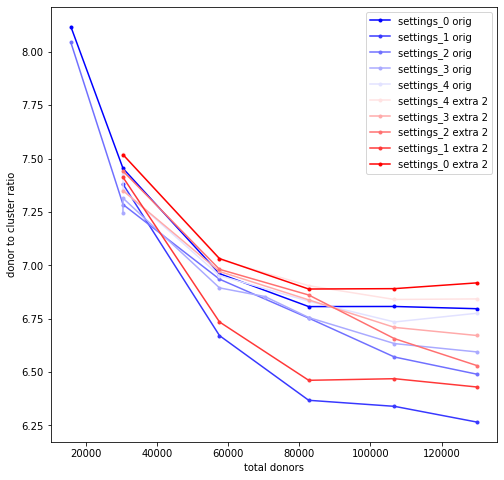

In [13]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [14]:
avg_size_sets = []
for i, file in enumerate(files):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file[1], color])

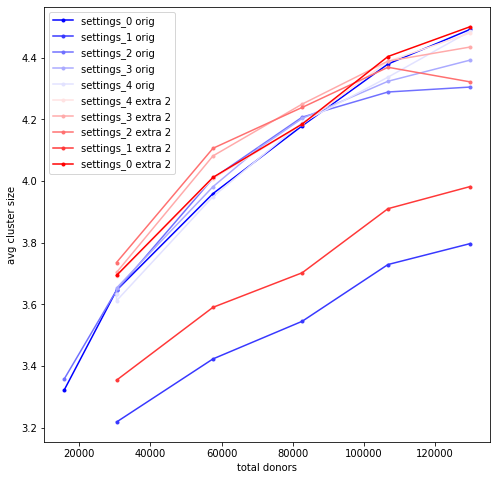

In [15]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [16]:
biggest_size_sets = []
for i,file in enumerate(files):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file[1], color])

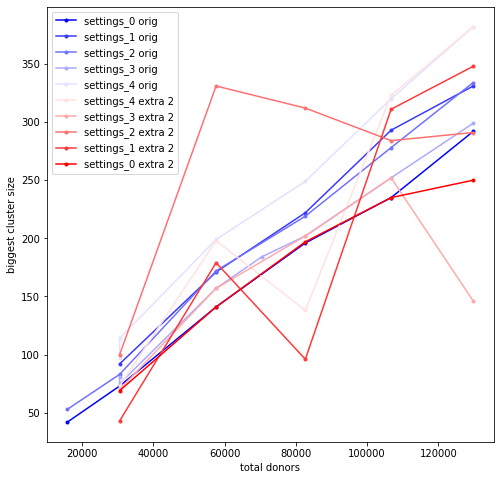

In [17]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [18]:
total_clusters_sets = []
for i,file in enumerate(files):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file[0], color])

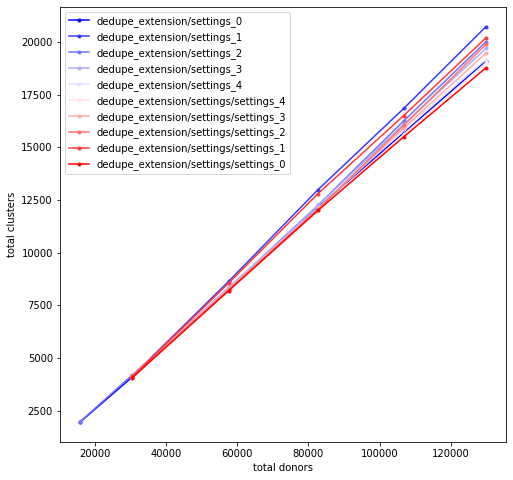

In [19]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()

In [24]:
purple = [cm.Purples(x) for x in [.5,1.0]]
blue = [cm.Blues(x) for x in [.5,.75]]
green = [cm.Greens(x) for x in [.5,.75]]
orange = [cm.Oranges(x) for x in [.5,.75]]
red = [cm.Reds(x) for x in [.4,.75]]

In [25]:
files_grouped = [['dedupe_extension/settings_0','settings_0 orig', purple[0]],
         ['dedupe_extension/settings/settings_0','settings_0 extra 2', purple[1]],
         ['dedupe_extension/settings_1','settings_1 orig', blue[0]],
         ['dedupe_extension/settings/settings_1','settings_1 extra 2', blue[1]],
         ['dedupe_extension/settings_2','settings_2 orig', green[0]],
         ['dedupe_extension/settings/settings_2','settings_2 extra 2', green[1]],
         ['dedupe_extension/settings_3','settings_3 orig', orange[0]],
         ['dedupe_extension/settings/settings_3','settings_3 extra 2', orange[1]],
         ['dedupe_extension/settings_4', 'settings_4 orig', red[0]],
         ['dedupe_extension/settings/settings_4','settings_4 extra 2', red[1]]]

In [26]:
ratio_sets = []
for i, file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file[1], file[2]])

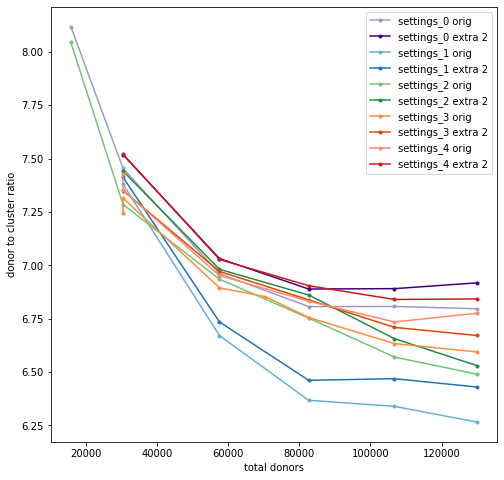

In [27]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [28]:
avg_size_sets = []
for i, file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file[1],file[2]])

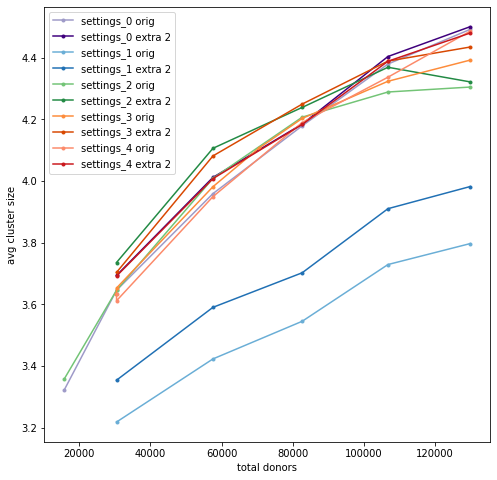

In [29]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [30]:
biggest_size_sets = []
for i,file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file[1], file[2]])

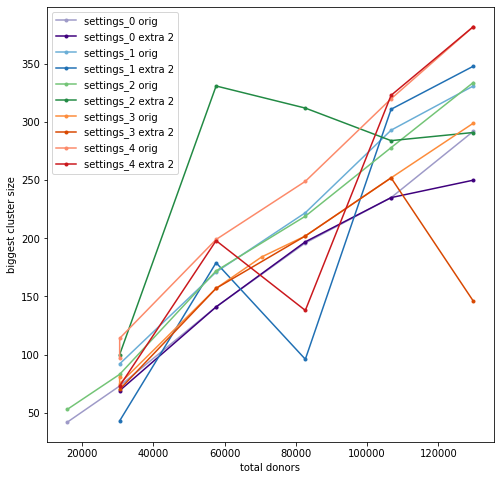

In [31]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [32]:
total_clusters_sets = []
for i,file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file[1], file[2]])

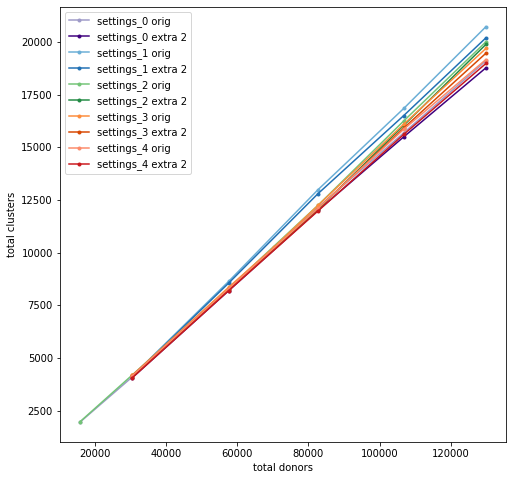

In [33]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()